# Import libraries

In [ ]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize parameters and environment

In [ ]:
params = {
    "discount": 0.9,
    "tol": 1e-3,
    "max_iters": 1000,
    "sim_N": 20,
    "limit": 100
}

In [ ]:
env = gym.make('CliffWalking-v0')

# Changing the dynamics of terminal state
env.P[47] = {
    0: [(1.0, 47, 0, True)],
    1: [(1.0, 47, 0, True)],
    2: [(1.0, 47, 0, True)],
    3: [(1.0, 47, 0, True)]
}

env.P[36][1] = [(1.0, 36, -100, True)]

for i in range(25, 35):
    env.P[i][2] = [(1.0, 36, -100, True)]

for i in range(37, 47):
    env.P[i][0] = [(1.0, 36, -100, True)]
    env.P[i][1] = [(1.0, 36, -100, True)]
    env.P[i][2] = [(1.0, 36, -100, True)]
    env.P[i][3] = [(1.0, 36, -100, True)]

In [ ]:
nS = env.observation_space.n
nA = env.action_space.n

print("Number of states :", nS, "\nNumber of actions:", nA)

Number of states : 48 
Number of actions: 4


# DP Agent using Value Iteration algorithm

In [ ]:
class DPAgentValueIteration():
    '''
    Models Dynamic Programming RL agent which is trained using Value Iteration algorithm
    '''
    def __init__(self, env, params):
        '''
        Method to initialize the DP agent model

        Input
        -----
        env     : Environment
        params  : Parameters for training and simulation
        '''
        self.env = env
        self.nS = env.observation_space.n
        self.nA = env.action_space.n
        self.params = params
        
        # Initialize state values
        self.V = np.random.rand(self.nS)
        self.V[-1] = 0

        # Initialize policy
        # self.policy = np.random.randint(self.nA, size=self.nS)
        self.policy = np.zeros(self.nS)
        self.policy[-1] = 0

    def value_iteration(self):
        '''
        Method to train the model using Value Iteration algorithm

        Output
        ------
        V       : State values
        returns : List with returns after each training iteration
        '''
        V = np.random.rand(self.nS)
        V[-1] = 0

        returns = []
        iter = 0

        while True:
            delta = 0

            for state in range(self.nS):
                v = V[state]
                max_val = -100000

                for action in range(self.nA):
                    val = 0

                    for tmp in self.env.P[state][action]:
                        val += tmp[0] * (tmp[2] + self.params["discount"] * V[tmp[1]])

                    if val > max_val:
                        max_val = val

                V[state] = max_val
                delta = max(delta, abs(V[state] - v))

            self.V = V
            self.update_policy()

            rets = []
            for i in range(self.params["sim_N"]):
                rets.append(self.simulate())
            returns.append(np.mean(rets))
            
            iter += 1

            if delta < self.params["tol"]:
                break

        print("Number of iterations taken to converge:", iter, "\n")
        
        return V, returns

    def train_agent(self):
        '''
        Method to train agent

        Output
        ------
        returns: A list with returns after each training iteration
        '''
        self.V, returns = self.value_iteration()
        self.update_policy()
        return returns

    def update_policy(self):
        '''
        Method to update policy
        '''
        for state in range(self.nS):
            max_value = -1000000
            max_action = -1

            for action in range(self.nA):
                val = 0

                for tmp in self.env.P[state][action]:
                    val += tmp[0] * (tmp[2] + self.params["discount"] * self.V[tmp[1]])
                
                if val > max_value:
                    max_value = val
                    max_action = action

            self.policy[state] = max_action

    def simulate(self):
        '''
        Method to run the simulation using current policy

        Output
        ------
        ret: Return of the simulation
        '''
        ret = 0
        state = self.env.reset()
        done = False
        iter = 0

        while not done and iter < self.params["max_iters"]:
            if random.uniform(0, 1) < 0.1:
                action = self.env.action_space.sample()
            else:
                action = self.policy[state]

            obs, reward, done, info = self.env.step(action)
            ret += reward

            state = obs
            iter += 1

        return ret

    def get_nS(self):
        '''
        Getter method for number of states
        '''
        return self.nS

    def get_nA(self):
        '''
        Getter method for number of actions
        '''
        return self.nA

    def get_policy_state(self, state):
        '''
        Getter method for policy of the input state
        '''
        return self.policy[state]

    def get_state_value(self, state):
        '''
        Getter method for state value of the input state
        '''
        return self.V[state]

Number of iterations taken to converge: 16 



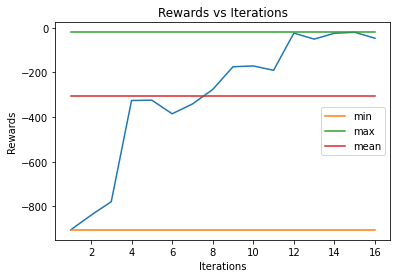

In [ ]:
# Initialize agent
vi_agent = DPAgentValueIteration(env, params)

# Train the agent and get returns list
returns = vi_agent.train_agent()

# Plot the returns vs iterations plot
len1 = len(returns)
x = np.arange(len1)+1
plt.plot(x, returns)

min_ret, max_ret, mean_ret = np.min(returns), np.max(returns), np.mean(returns)
plt.plot(x, np.ones(len1)*min_ret, label="min")
plt.plot(x, np.ones(len1)*max_ret, label="max")
plt.plot(x, np.ones(len1)*mean_ret, label="mean")
plt.legend()
plt.title("Rewards vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Rewards")
plt.show()

We see that the Value Iteration algorithm converged at 16th iteration. Hence the value of N is 16, i.e., the number of iterations it took to converge.

After each iteration, I have computed the intermediate policy which is used to simulate episodes to check the learning of the agent. 20 episodes are simulated and the mean of returns observed is taken.

We see that the learning curve is increase, i.e., the mean rewards is increasing through iterations. Hence, the agent is learning policies through iteraitons. We see that towards the end, the mean reward obtained is around 25.

In [ ]:
# Agent's policy
vi_agent.policy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We see that the optimal policy obtained after training the agent using Value Iteration algorithm is indeed optimal. All the actions in every state are aigned towards the terminal state without falling into cliff.

# DP Agent using Policy Iteration algorithm

In [ ]:
class DPAgentPolicyIteration():
    '''
    Models Dynamic Programming agent which will be trianed using Policy Iteration algorithm
    '''
    def __init__(self, env, params):
        '''
        Method to initialize model

        Input
        -----
        env     : Environment
        params  : Parameters for training and simulation
        '''
        self.env = env
        self.nS = env.observation_space.n
        self.nA = env.action_space.n
        self.params = params

        self.V = np.random.rand(self.nS)
        self.V[-1] = 0
        self.policy = np.random.randint(self.nA, size=self.nS)
        self.policy[-1] = 0

    def policy_evaluation(self, policy):
        '''
        Method for policy evaluation given the policy

        Input
        -----
        policy: Policy to be evaluated

        Output
        ------
        V: State values corresponding to input policy
        '''
        V = np.random.rand(self.nS)
        V[-1] = 0
        iter = 0

        while True and iter < 10000:
            delta = 0
            
            for state in range(self.nS):
                v = V[state]
                val = 0

                for tmp in self.env.P[state][policy[state]]:
                    val += tmp[0] * (tmp[2] + self.params["discount"] * V[tmp[1]])

                V[state] = val
                delta = max(delta, abs(V[state] - v))

            if delta < self.params["tol"]:
                break

            iter += 1
            
        return V

    def policy_improvement(self, V, policy):
        '''
        Method for policy improvement

        Input
        -----
        V       : State values
        policy  : Input policy

        Output
        ------
        policy          : Improved policy
        policy_stable   : Status of the policy improvement (Boolean)
        '''
        policy_stable = True

        for state in range(self.nS):
            old_action = policy[state]
            max_value = -100000
            max_action = -1

            for action in range(self.nA):
                val = 0

                for tmp in self.env.P[state][action]:
                    val += tmp[0] * (tmp[2] + self.params["discount"] * V[tmp[1]])

                if val > max_value:
                    max_value = val
                    max_action = action

            policy[state] = max_action

            if old_action != policy[state]:
                policy_stable = False

        return policy, policy_stable

    def policy_iteration(self):
        '''
        Method for policy iteration

        Output
        ------
        V       : State values corresponding to optimal policy
        policy  : Optimal policy
        returns : List of returns of each iteration
        '''
        V = np.random.rand(self.nS)
        V[-1] = 0
        # policy = np.random.randint(self.nA, size=self.nS)
        policy = np.zeros(nS)
        policy[-1] = 0
        
        policy_stable = False
        iter = 0
        returns = []

        while not policy_stable and iter < self.params["limit"]:
            # Policy Evaluation
            V = self.policy_evaluation(policy)
            self.V = V

            # Policy Improvement
            policy, policy_stable = self.policy_improvement(V, policy)
            self.policy = policy

            rets = []
            for i in range(self.params["sim_N"]):
                rets.append(self.simulate())
            returns.append(np.mean(rets))

            iter += 1

        print("Number of iterations taken for convergence:", iter, "\n")

        return V, policy, returns

    def train_agent(self, ):
        '''
        Method to train agent

        Output
        ------
        returns: List of returns of each iteration of policy iteration
        '''
        self.V, self.policy, returns = self.policy_iteration()
        return returns

    def simulate(self):
        '''
        Method for simulation based on current policy

        Output
        ------
        ret: Return of the simulation
        '''
        ret = 0
        state = self.env.reset()
        done = False
        iter = 0

        while not done and iter < self.params["max_iters"]:
            if random.uniform(0, 1) < 0.1:
                action = self.env.action_space.sample()
            else:
                action = self.policy[state]

            obs, reward, done, info = self.env.step(action)
            ret += reward

            state = obs
            iter += 1

        return ret

    def get_nS(self):
        '''
        Getter method for number of states
        '''
        return self.nS

    def get_nA(self):
        '''
        Getter method for number of actions
        '''
        return self.nA

    def get_policy_state(self, state):
        '''
        Getter method for current policy of input state
        '''
        return self.policy[state]

    def get_state_value(self, state):
        '''
        Getter method for state value of input state
        '''
        return self.V[state]

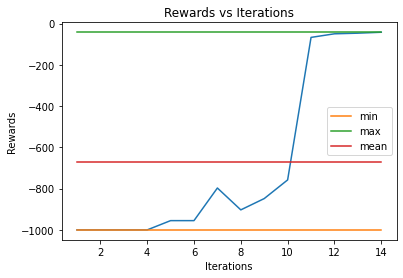

In [ ]:
pi_agent = DPAgentPolicyIteration(env, params)
returns = pi_agent.train_agent()

# Plot the returns vs iterations plot
len1 = len(returns)
x = np.arange(len1)+1
plt.plot(x, returns)

min_ret, max_ret, mean_ret = np.min(returns), np.max(returns), np.mean(returns)
plt.plot(x, np.ones(len1)*min_ret, label="min")
plt.plot(x, np.ones(len1)*max_ret, label="max")
plt.plot(x, np.ones(len1)*mean_ret, label="mean")
plt.legend()
plt.title("Rewards vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Rewards")
plt.show()

We see that the Policy Iteration algorithm converged at 14th iteration. Hence the value of N is 14, i.e., the number of iterations it took to converge.

After each iteration, we have the intermediate policy obtained after policy improvement which is used to simulate episodes to check the learning of the agent. 20 episodes are simulated and the mean of returns observed is taken.

We see that the learning curve is increase, i.e., the mean rewards is increasing through iterations. Hence, the agent is learning policies through iterations. We see that towards the end, the mean reward obtained is around 25.

In [ ]:
pi_agent.policy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We see that the optimal policy obtained after training the agent using Policy Iteration algorithm is indeed optimal. All the actions in every state are aigned towards the terminal state without falling into cliff.

# Confused Agent (random actions)

In [ ]:
class ConfusedAgent():
    '''
    Models confused agent which selects actions randomly
    '''
    def __init__(self, env, params):
        '''
        Method to initialize the model

        Input
        -----
        env    : Environment
        params : Parameters
        '''
        self.env = env
        self.nS = env.observation_space.n
        self.nA = env.action_space.n
        self.params = params

        self.policy = np.random.randint(self.nA, size=self.nS)

    def simulate(self):
        '''
        Method for simulating episode

        Output
        ------
        ret: Return of the simulation
        '''
        ret = 0
        state = self.env.reset()
        done = False
        iter = 0

        while not done and iter < self.params["max_iters"]:
            action = self.env.action_space.sample()

            obs, reward, done, info = self.env.step(action)
            ret += reward

            state = obs
            iter += 1

        return ret

    def get_policy(self):
        '''
        Getter method for policy
        '''
        return policy

    def get_policy_state(self, state):
        '''
        Getter method for policy of input state
        '''
        return self.policy[state]

    def get_nS(self):
        '''
        Getter method for number of states
        '''
        return self.nS

    def get_nA(self):
        '''
        Getter method for number of actions
        '''
        return self.nA

In [ ]:
confused_agent = ConfusedAgent(env, params)

# Comparing performance of agents

In [ ]:
vi_rew = []
pi_rew = []
cf_rew = []

# Simulations on VI trained agent
for i in range(100):
    state = env.reset()
    done = False
    rew = 0

    while not done:
        obs, reward, done, info = env.step(vi_agent.get_policy_state(state))
        rew += reward
        state = obs
    
    vi_rew.append(rew)

# Simulations on PI trained agent
for i in range(100):
    state = env.reset()
    done = False
    rew = 0

    while not done:
        obs, reward, done, info = env.step(pi_agent.get_policy_state(state))
        rew += reward
        state = obs
    
    pi_rew.append(rew)

# Simulations on confused agent
for i in range(100):
    cf_rew.append(confused_agent.simulate())


print("Reward from VI trained agent:", np.mean(vi_rew))
print("Reward from PI trained agent:", np.mean(pi_rew))
print("Reward from confused agent  :", np.mean(cf_rew))

Reward from VI trained agent: -13.0
Reward from PI trained agent: -13.0
Reward from confused agent  : -109.6


I have averaged the rewards obtained from 100 episodes generated from the trained agents. We can clearly see that agents trained using Value Iteration and Policy Iteration algorithms are doing better than the confused agent as the mean reward obtained by episode using confused agent is **-109.6**, whereas that of agents trained using VI and PI algorithms are **-13** each. This is the best reward obtained by following the optimal policy, i.e. traveling from start state to terminal state along the cliff. Hence, we see that VI and PI trained agents are doing perfectly well, whereas confused agent takes random steps due to which the convergence is slower and hence reward is lower. Hence, VI and PI trained agents are doing better than confused agent.

# Discount Factor Analysis

In [ ]:
all_gammas = [0, 0.1, 0.5, 0.7, 1]

def print_policy(policy):
    print(policy[:12])
    print(policy[12:24])
    print(policy[24:36])
    print(policy[36:])

In [ ]:
print("Agents trained using Value Iteration algorithm\n")

for gam in all_gammas:
    print("Discount factor (gamma):", gam)

    params1 = params
    params1["discount"] = gam

    vi_agent = DPAgentValueIteration(env, params1)
    _ = vi_agent.train_agent()

    print_policy(vi_agent.policy)
    print("\n\n")

Agents trained using Value Iteration algorithm

Discount factor (gamma): 0
Number of iterations taken to converge: 2 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



Discount factor (gamma): 0.1
Number of iterations taken to converge: 5 

[0. 0. 3. 0. 0. 0. 0. 3. 0. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2.]
[1. 3. 0. 1. 0. 0. 1. 1. 1. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



Discount factor (gamma): 0.5
Number of iterations taken to converge: 12 

[0. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



Discount factor (gamma): 0.7
Number of iterations taken to converge: 16 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



Discount factor (gamma): 1
Number of ite

In [ ]:
print("Agents trained using Policy Iteration algorithm\n")

for gam in all_gammas:
    print("Discount factor (gamma):", gam)

    params1 = params
    params1["discount"] = gam

    pi_agent = DPAgentPolicyIteration(env, params1)
    _ = pi_agent.train_agent()

    print_policy(pi_agent.policy)
    print("\n\n")

Agents trained using Policy Iteration algorithm

Discount factor (gamma): 0
Number of iterations taken for convergence: 1 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



Discount factor (gamma): 0.1
Number of iterations taken for convergence: 100 

[0. 3. 1. 0. 0. 3. 3. 0. 3. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



Discount factor (gamma): 0.5
Number of iterations taken for convergence: 12 

[0. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



Discount factor (gamma): 0.7
Number of iterations taken for convergence: 12 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



Discount factor (gamm

The above policies are obtained by training the agents using Value Iteration algorithm and Policy Iteration algorithm. We see that policies obtained by these two agents are almost similar for all discount factors.

### Discount factor 0

We see that all states have the policy (action) as 0 for gamma 0. This is the case for both agents trained by VI and PI. That means the agent hasn't learnt anything. The number of iterations taken to converge is also only **2/1** in VI/PI, which also shows that the agent didn't learn anything. This is because when gamma is 0, the agent becomes myopic (looks at only immediate rewards), due to which it didn't bother about future rewards and looked at current immediate rewards. But as we initialize state values with 0s, it converged in 1 step. Hence, discount factor os 0 will make the agent myopic and hence the convergence will not be guaranteed, because it doesn't care if the terminal state has to be reached.

### Discount factor 0.1
We see that when discount factor (gamma) is 0.1, some states have updated their policies (best actions) in both agents VI/PI. We can see that one third of right most states, all have policy (determinstic action) as optimal actions to be taken to reach terminal state. Right most staes have action as 2 (down) which is required to reach state 47. Similary all other states in one third of right most states have action as 1 (right), which is required to reach the last column state, which lead to terminal state 47. But we can also see that many other states have 3s and 0s, which are not optimal actions, mainly the left two thirds of states. But lower discount factor constrains the agent to finish quicker due to which it finds suboptimal actions which leads to other states than terminal states which are nearer to those states and which maximize the rewards. Hence, states which are farther from terminal states doesn't get updated with optimal policy. Only neared states are updated with optimal policy.

### Discount factor 0.5
For discount factor 0.5, we see that now almost all states have optimal policy, except for states 0, 1 and 12 which are the most distant states from the terminal state. This is the case for both agents trained using VI/PI algorithms. Hence, we see that as the discount factor is increase the states farther from terminal states are updated with optimal policy based on distance.

### Discount factor 0.7
For discount factor 0.7, we see that for both agents trained using VI and PI, all states have optmial policy, i.e., from any states, it takes the shortest path to reach the terminal states and hence maximizing the reward.

### Discount factor 1
For discount factor 1 also, we see that for both agents trained using VI and PI, all states have optimal policy. But we also see that Policy Iteration algorithm converged after 100 iterations (which is upper limit fed into the agent). However, we saw that the agent was stuck in policy evaluation stage, where it computes the state values corresponding to input policy. Discount factor 0 means the agent can take infinite time to finish the episode and hence, it was stuck in infinite loop, while evaluating a policy. Hence, discount factor 1 can have issues with convergence (infinite horizon or slow convergence).

## Analysis
Hence, we saw that discount factor has an impact on convergence, path of the agent from any state and optimal policy. We see that lower discount factor can have longer paths from distant states to terminal state (because distant states are updated with suboptimal policy), whereas for higher discount factors, all states have optimal policy and hence shortest path to terminal state from any state. However, keeping discount factor as 1 can lead to issues with convergence.